In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("New_161_data_Strain_rate_Composition_SRO_yield.csv")

In [4]:
df.head(10)

,Fe-Fe (SRO),Fe-Ni (SRO),Cr-Fe (SRO),Co-Fe (SRO),Al-Fe (SRO),Ni-Ni (SRO),Cr-Ni (SRO),Co-Ni (SRO),Al-Ni (SRO),Cr-Cr (SRO),...,Al-Cr (SRO),Co-Co (SRO),Al-Co (SRO),Al-Al(SRO),Al (at%),Co (at%),Cr (at%),Fe (at%),Ni (at%),Yield Stress (GPa)
0,-0.180247,0.092438,0.146759,0.144797,-1.239506,-0.052160,-0.040123,-0.010935,0.087037,-0.104938,...,0.560494,-0.060519,0.215520,0.881481,0.05,0.35,0.2,0.2,0.2,11.0897
1,-0.165432,0.116821,0.168673,0.132988,-1.148663,-0.032407,-0.067593,-0.020606,0.061728,-0.098457,...,0.526749,-0.040732,0.170903,0.910837,0.06,0.34,0.2,0.2,0.2,10.4649
2,-0.168827,0.097222,0.195525,0.147868,-1.049383,-0.020988,-0.056944,-0.010756,-0.004409,-0.145370,...,0.479277,-0.057262,0.157180,0.901738,0.07,0.33,0.2,0.2,0.2,10.2925
3,-0.166975,0.102623,0.223302,0.151427,-1.003086,-0.035494,-0.079938,0.005498,0.010417,-0.145370,...,0.427469,-0.065297,0.133150,0.880401,0.08,0.32,0.2,0.2,0.2,9.7913
4,-0.159877,0.121142,0.209722,0.155814,-0.916667,-0.038272,-0.070988,-0.000498,-0.024691,-0.154938,...,0.388889,-0.066148,0.110359,0.847584,0.09,0.31,0.2,0.2,0.2,9.5492
5,-0.151235,0.119136,0.200926,0.168313,-0.842593,-0.048148,-0.058179,0.002572,-0.033333,-0.175000,...,0.359568,-0.068176,0.059465,0.855556,0.10,0.30,0.2,0.2,0.2,9.1232
6,-0.176543,0.131173,0.230401,0.174862,-0.797419,-0.029630,-0.070370,0.011175,-0.086139,-0.186728,...,0.354377,-0.066631,0.048338,0.834711,0.11,0.29,0.2,0.2,0.2,8.7142
7,-0.150309,0.122685,0.221296,0.183862,-0.751800,-0.030556,-0.054167,0.022266,-0.115226,-0.171914,...,0.298097,-0.080089,0.050375,0.830247,0.12,0.28,0.2,0.2,0.2,8.5500
8,-0.104321,0.095988,0.223765,0.176726,-0.699193,-0.013889,-0.035340,0.026520,-0.127968,-0.190741,...,0.259259,-0.074193,0.031163,0.807875,0.13,0.27,0.2,0.2,0.2,8.5893
9,-0.113272,0.124228,0.228858,0.177944,-0.675265,-0.007099,-0.060802,0.029202,-0.137787,-0.178704,...,0.230379,-0.082256,0.021503,0.788360,0.14,0.26,0.2,0.2,0.2,7.9716


In [5]:
df.describe()

,Fe-Fe (SRO),Fe-Ni (SRO),Cr-Fe (SRO),Co-Fe (SRO),Al-Fe (SRO),Ni-Ni (SRO),Cr-Ni (SRO),Co-Ni (SRO),Al-Ni (SRO),Cr-Cr (SRO),...,Al-Cr (SRO),Co-Co (SRO),Al-Co (SRO),Al-Al(SRO),Al (at%),Co (at%),Cr (at%),Fe (at%),Ni (at%),Yield Stress (GPa)
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.007929,0.094683,0.119702,0.154558,-0.399406,-0.008865,-0.006125,0.054740,-0.074152,-0.114590,...,0.098184,-0.066485,-0.083204,0.549015,0.215250,0.196176,0.196176,0.196176,0.196176,5.657821
std,0.099764,0.071746,0.107981,0.078817,0.309362,0.077452,0.076587,0.097108,0.111144,0.078717,...,0.169589,0.117946,0.245754,0.224381,0.096719,0.068300,0.068300,0.068300,0.068300,4.774138
min,-0.180247,-0.086420,-0.110494,0.000000,-1.282716,-0.266156,-0.173855,-0.198560,-0.369602,-0.326474,...,-0.228060,-0.314421,-0.842328,0.125933,0.050000,0.000000,0.000000,0.000000,0.000000,0.689600
25%,-0.052516,0.054401,0.000000,0.111715,-0.551041,-0.051036,-0.064043,-0.014947,-0.125209,-0.169213,...,0.000000,-0.147302,-0.172215,0.353116,0.137500,0.200000,0.200000,0.200000,0.200000,1.334050
50%,0.000000,0.102469,0.165432,0.162512,-0.378389,-0.019444,0.000000,0.025729,-0.086393,-0.133025,...,0.053139,-0.053243,-0.038582,0.502812,0.215000,0.200000,0.200000,0.200000,0.200000,4.439550
75%,0.082407,0.137114,0.203627,0.208572,-0.193742,0.015413,0.054037,0.135180,-0.024369,-0.059293,...,0.153622,-0.012614,0.060840,0.771015,0.292500,0.208300,0.208300,0.208300,0.208300,9.560100
max,0.226543,0.241049,0.264815,0.309414,0.300000,0.196914,0.151852,0.275018,0.368519,0.100617,...,0.587037,0.261449,0.529453,0.933227,0.400000,0.350000,0.350000,0.350000,0.350000,18.926900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fe-Fe (SRO)         160 non-null    float64
 1   Fe-Ni (SRO)         160 non-null    float64
 2   Cr-Fe (SRO)         160 non-null    float64
 3   Co-Fe (SRO)         160 non-null    float64
 4   Al-Fe (SRO)         160 non-null    float64
 5   Ni-Ni (SRO)         160 non-null    float64
 6   Cr-Ni (SRO)         160 non-null    float64
 7   Co-Ni (SRO)         160 non-null    float64
 8   Al-Ni (SRO)         160 non-null    float64
 9   Cr-Cr (SRO)         160 non-null    float64
 10  Co-Cr (SRO)         160 non-null    float64
 11  Al-Cr (SRO)         160 non-null    float64
 12  Co-Co (SRO)         160 non-null    float64
 13  Al-Co (SRO)         160 non-null    float64
 14  Al-Al(SRO)          160 non-null    float64
 15  Al (at%)            160 non-null    float64
 16  Co (at%)

In [7]:
plt.savefig("my_heatmap.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

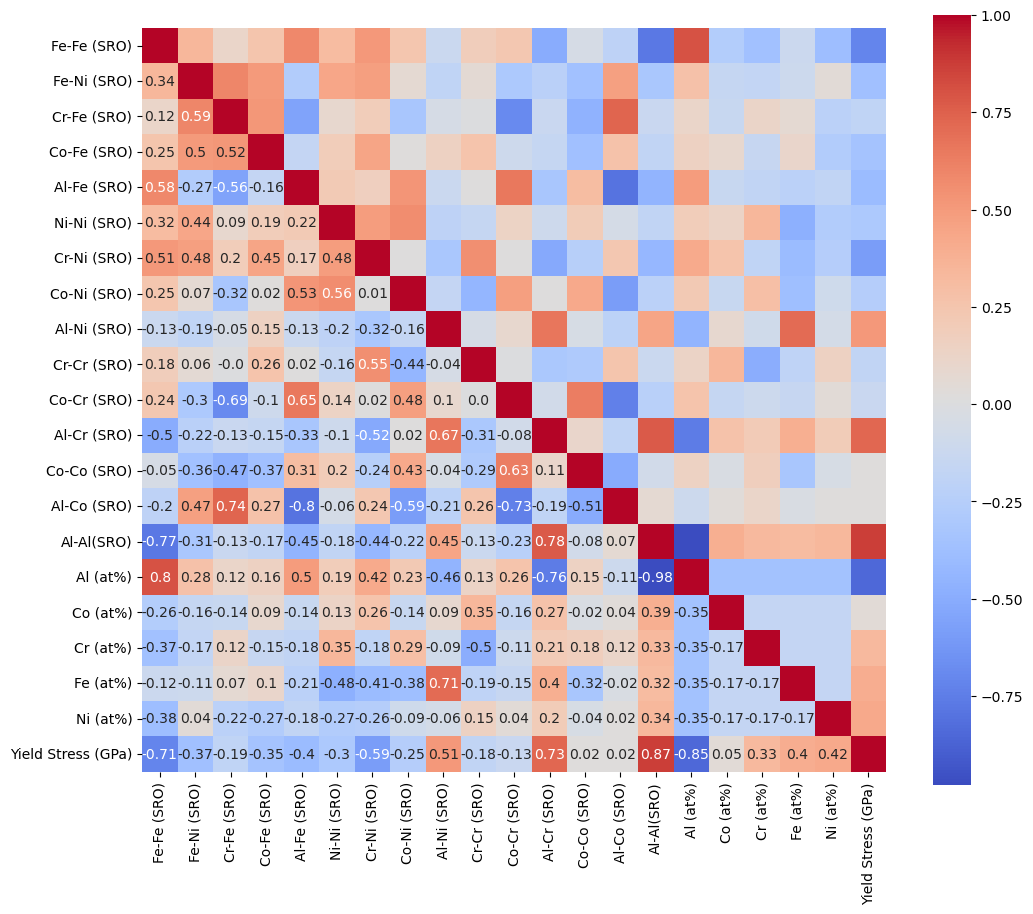

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose you already have your DataFrame 'df'
corr = df.corr()

# 1. Convert the correlation matrix to strings with desired precision
#    (e.g., 2 decimal places).
annot_matrix = corr.round(2).astype(str)

# 2. Identify the upper triangle (you can also exclude the diagonal if desired)
#    Setting k=1 excludes the diagonal. Setting k=0 includes the diagonal in the upper half.
mask_upper = np.triu(np.ones_like(corr, dtype=bool), k=0)

# 3. Replace the upper triangle (including diagonal) with empty strings.
annot_matrix = annot_matrix.mask(mask_upper, "")

# 4. Create a heatmap:
#    - 'corr' is used for the color scale across the entire matrix
#    - 'annot_matrix' has text in the lower half (and diagonal if you like) only
#    - 'fmt=""' tells Seaborn to use the strings in 'annot_matrix' directly
plt.figure(figsize=(12, 10))  # make the figure larger so each cell is bigger
sns.heatmap(
    corr, 
    cmap="coolwarm",
    annot=annot_matrix, 
    fmt="",            # use empty format because we already have string values in 'annot_matrix'
    square=True,
    annot_kws={"size": 10}  # adjust annotation font size
)
plt.show()



Checking for NaN values:
Fe-Fe (SRO)           0
Fe-Ni (SRO)           0
Cr-Fe (SRO)           0
Co-Fe (SRO)           0
Al-Fe (SRO)           0
Ni-Ni (SRO)           0
Cr-Ni (SRO)           0
Co-Ni (SRO)           0
Al-Ni (SRO)           0
Cr-Cr (SRO)           0
Co-Cr (SRO)           0
Al-Cr (SRO)           0
Co-Co (SRO)           0
Al-Co (SRO)           0
Al-Al(SRO)            0
Al (at%)              0
Co (at%)              0
Cr (at%)              0
Fe (at%)              0
Ni (at%)              0
Yield Stress (GPa)    0
dtype: int64

Checking for columns with zero variance:


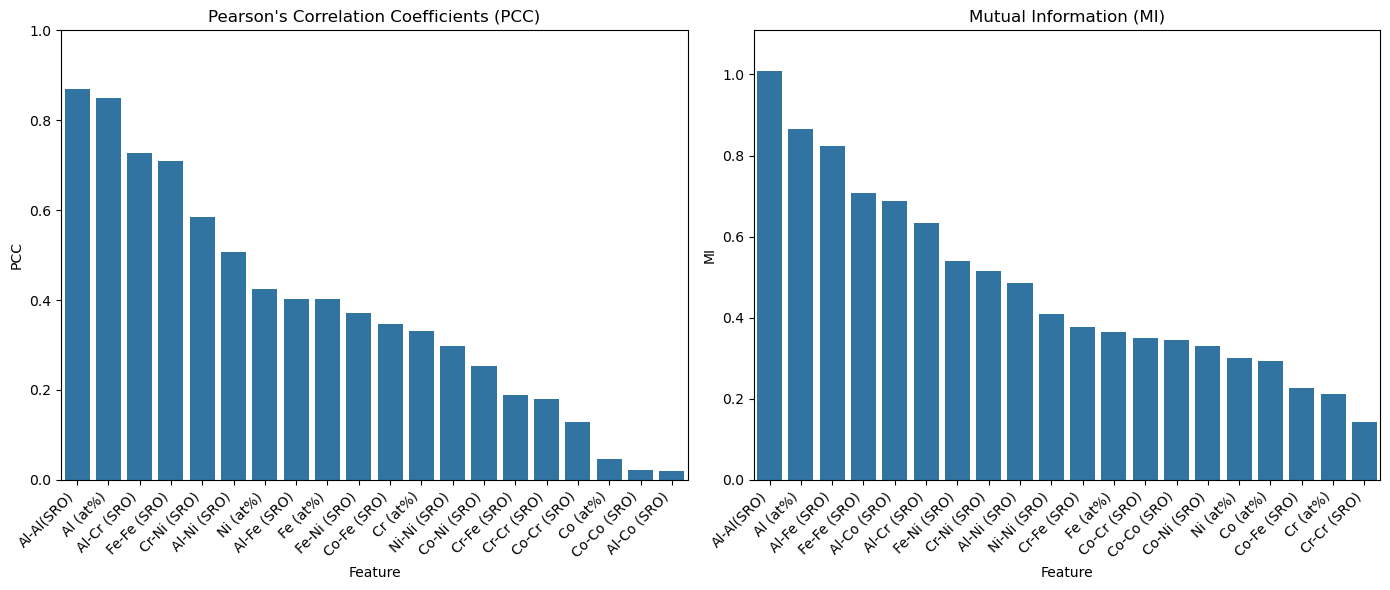


PCC Values:
        Feature       PCC
14   Al-Al(SRO)  0.869820
15     Al (at%)  0.849955
11  Al-Cr (SRO)  0.728037
0   Fe-Fe (SRO)  0.709838
6   Cr-Ni (SRO)  0.585613
8   Al-Ni (SRO)  0.506791
19     Ni (at%)  0.424112
4   Al-Fe (SRO)  0.402452
18     Fe (at%)  0.401363
1   Fe-Ni (SRO)  0.372118
3   Co-Fe (SRO)  0.346417
17     Cr (at%)  0.331555
5   Ni-Ni (SRO)  0.298296
7   Co-Ni (SRO)  0.253064
2   Cr-Fe (SRO)  0.188074
9   Cr-Cr (SRO)  0.180767
10  Co-Cr (SRO)  0.128950
16     Co (at%)  0.045990
12  Co-Co (SRO)  0.022674
13  Al-Co (SRO)  0.019170

MI Values:
        Feature        MI
14   Al-Al(SRO)  1.008766
15     Al (at%)  0.866093
4   Al-Fe (SRO)  0.823195
0   Fe-Fe (SRO)  0.707229
13  Al-Co (SRO)  0.687154
11  Al-Cr (SRO)  0.634133
1   Fe-Ni (SRO)  0.539938
6   Cr-Ni (SRO)  0.514118
8   Al-Ni (SRO)  0.484488
5   Ni-Ni (SRO)  0.408476
2   Cr-Fe (SRO)  0.377075
18     Fe (at%)  0.365139
10  Co-Cr (SRO)  0.349199
12  Co-Co (SRO)  0.344461
7   Co-Ni (SRO)  0.330615
19     Ni (at

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

#----------------------------------------------------
# STEP 1: Load or Prepare Your DataFrame
#----------------------------------------------------
# Assuming your DataFrame, `df`, contains:
# - Columns for SRO parameters (Fe-Fe, Al-Fe, etc.)
# - A column "Yield Stress (GPa)" as the target variable

target_col = "Yield Stress (GPa)"  # Adjust as per your actual column name
feature_cols = [col for col in df.columns if col != target_col]

# Check for NaN values
print("Checking for NaN values:")
print(df.isna().sum())

# Check for columns with zero variance
print("\nChecking for columns with zero variance:")
for col in feature_cols + [target_col]:
    if df[col].std() == 0:
        print(f"Column {col} has zero variance (constant values).")

X = df[feature_cols].values  # Features
y = df[target_col].values    # Target

#----------------------------------------------------
# STEP 2: Compute Pearson Correlation Coefficients (PCC)
#----------------------------------------------------
# Compute absolute PCC values
pcc_dict = {
    col: abs(df[[col, target_col]].corr().iloc[0, 1]) 
    for col in feature_cols
}

# Convert to DataFrame
df_pcc = (
    pd.DataFrame({
        "Feature": list(pcc_dict.keys()),
        "PCC": list(pcc_dict.values())
    })
    .sort_values(by="PCC", ascending=False)
)

#----------------------------------------------------
# STEP 3: Compute Mutual Information (MI)
#----------------------------------------------------
mi_scores = mutual_info_regression(X, y, random_state=42)

# Convert to DataFrame
df_mi = (
    pd.DataFrame({
        "Feature": feature_cols,
        "MI": mi_scores
    })
    .sort_values(by="MI", ascending=False)
)

#----------------------------------------------------
# STEP 4: Plot Side-by-Side Bar Charts (PCC & MI)
#----------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Increased width for better label spacing

# Left plot = PCC (Pearson)
sns.barplot(x="Feature", y="PCC", data=df_pcc, ax=axes[0])
axes[0].set_title("Pearson's Correlation Coefficients (PCC)")
axes[0].set_ylim(0, 1.0)  # Since we're using absolute values
axes[0].set_xticks(range(len(df_pcc)))  # Set ticks first
axes[0].set_xticklabels(df_pcc["Feature"], rotation=45, ha='right', fontsize=10)

# Right plot = MI (Mutual Information)
sns.barplot(x="Feature", y="MI", data=df_mi, ax=axes[1])
axes[1].set_title("Mutual Information (MI)")
axes[1].set_ylim(0, max(1.0, df_mi["MI"].max() + 0.1))  # Adjust y-limit based on max MI value
axes[1].set_xticks(range(len(df_mi)))  # Set ticks first
axes[1].set_xticklabels(df_mi["Feature"], rotation=45, ha='right', fontsize=10)

# Adjust layout and save
plt.tight_layout()
plt.savefig("PCC_MI.png", dpi=300, bbox_inches="tight")
plt.show()

# Print the PCC and MI DataFrames for debugging
print("\nPCC Values:")
print(df_pcc)
print("\nMI Values:")
print(df_mi)


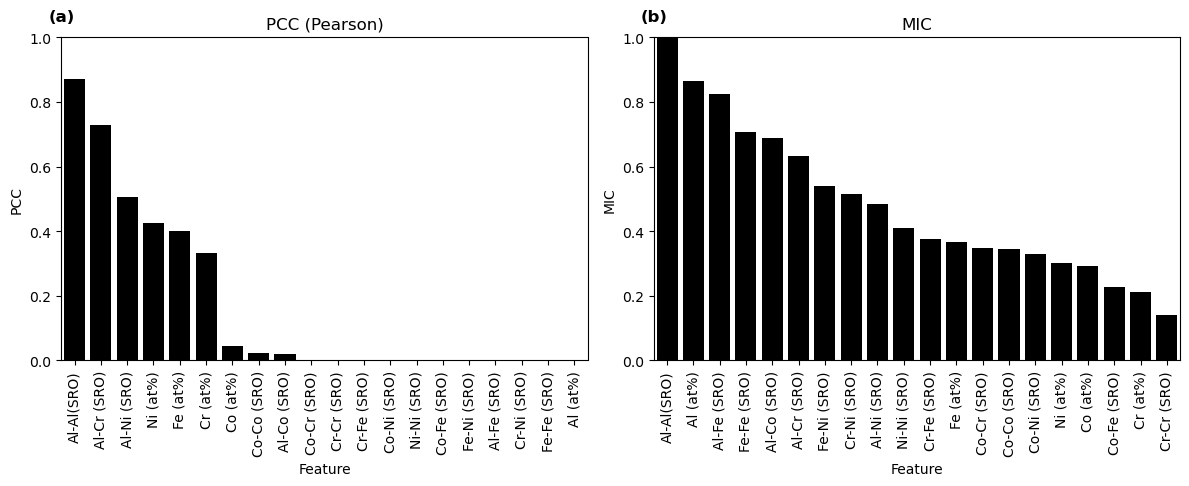

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

#----------------------------------------------------
# STEP 1: Load or Prepare Your DataFrame
#----------------------------------------------------
# Assuming your DataFrame, `df`, contains:
# - Columns for SRO parameters (Fe-Fe, Al-Fe, etc.)
# - A column "Yield Stress (GPa)" as the target variable

target_col = "Yield Stress (GPa)"  # Adjust as per your actual column name
feature_cols = [col for col in df.columns if col != target_col]

X = df[feature_cols].values         # Features
y = df[target_col].values           # Target

#----------------------------------------------------
# STEP 2: Compute Pearson Correlation Coefficients (PCC)
#----------------------------------------------------
pcc_dict = {col: df[[col, target_col]].corr().iloc[0,1] for col in feature_cols}

# Convert to DataFrame
df_pcc = pd.DataFrame({
    "Feature": list(pcc_dict.keys()),
    "PCC": list(pcc_dict.values())
}).sort_values(by="PCC", ascending=False)

#----------------------------------------------------
# STEP 3: Compute Mutual Information Coefficients (MIC)
#----------------------------------------------------
mi_scores = mutual_info_regression(X, y, random_state=42)

# Convert to DataFrame
df_mic = pd.DataFrame({
    "Feature": feature_cols,
    "MIC": mi_scores
}).sort_values(by="MIC", ascending=False)

#----------------------------------------------------
# STEP 4: Plot Side-by-Side Bar Charts (PCC & MIC)
#----------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot = PCC (Pearson)
sns.barplot(x="Feature", y="PCC", data=df_pcc, ax=axes[0], color="black")
axes[0].set_title("PCC (Pearson)")
axes[0].set_ylim(0, 1.0)
axes[0].set_xticks(range(len(df_pcc)))  # Set ticks first
axes[0].set_xticklabels(df_pcc["Feature"], rotation=90, fontsize=10)  

# Right plot = MIC (Mutual Information)
sns.barplot(x="Feature", y="MIC", data=df_mic, ax=axes[1], color="black")
axes[1].set_title("MIC")
axes[1].set_ylim(0, 1.0)
axes[1].set_xticks(range(len(df_mic)))  # Set ticks first
axes[1].set_xticklabels(df_mic["Feature"], rotation=90, fontsize=10)

# Set subplot labels (a) and (b) like in your image
axes[0].text(-1, 1.05, "(a)", fontsize=12, fontweight="bold")
axes[1].text(-1, 1.05, "(b)", fontsize=12, fontweight="bold")
plt.savefig("PIC_MIC.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

In [12]:
# Split the data into features (X) and target variable (y)
X = df.drop('Yield Stress (GPa)',axis=1)  # Assuming 'HV' is the target variable
y = df['Yield Stress (GPa)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42,max_depth=10,min_samples_leaf=2,min_samples_split=5,subsample=.8)
# Fit the model to the training dataBest hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}

gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                          n_estimators=200, random_state=42, subsample=0.8)

Text(0, 0.5, 'Predicted Y')

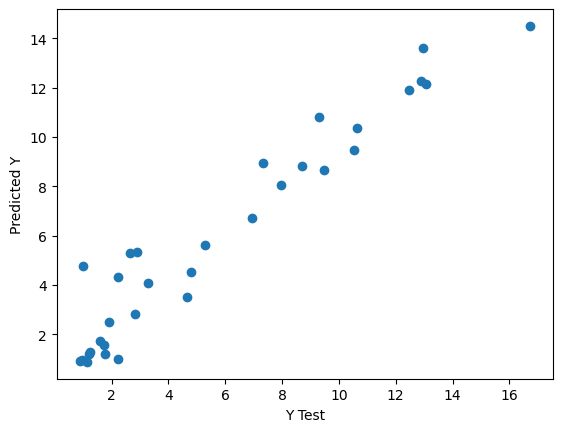

In [14]:
# Make predictions on the test set
predictions = gb_regressor.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

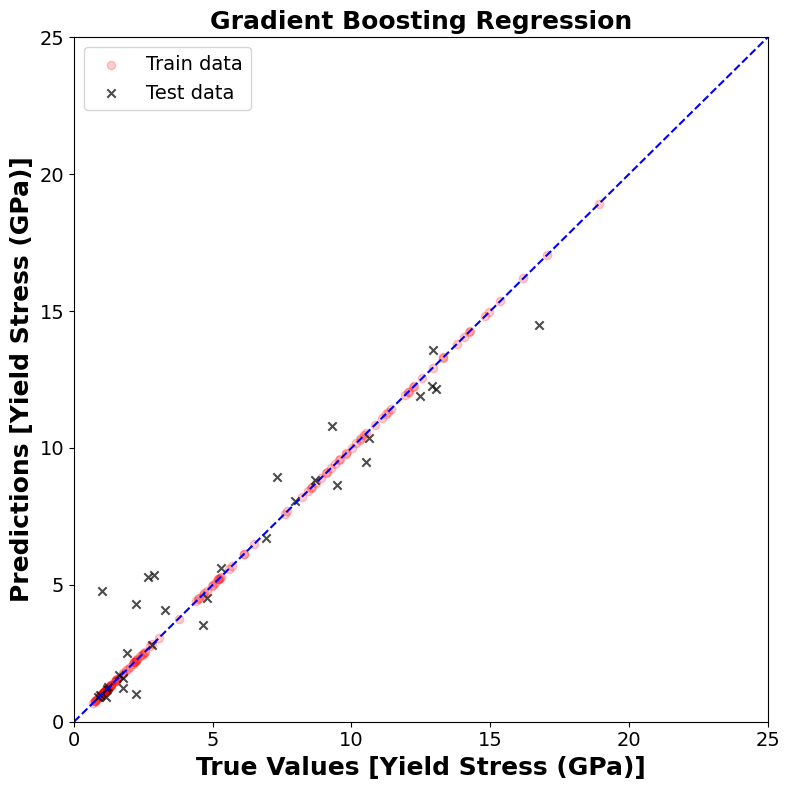

In [15]:
test_predictions = gb_regressor.predict(X_test)
train_predictions = gb_regressor.predict(X_train)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Plot train data
plt.scatter(y_train, train_predictions, c='red', alpha=0.2, label='Train data', marker='o')

# Plot test data
plt.scatter(y_test, test_predictions, c='black', alpha=0.7, label='Test data', marker='x')

# Set labels and title
plt.xlabel('True Values [Yield Stress (GPa)]', fontsize=18, fontweight='bold')
plt.ylabel('Predictions [Yield Stress (GPa)]', fontsize=18, fontweight='bold')
plt.title('Gradient Boosting Regression', fontsize=18, fontweight='bold')

# Set plot limits
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)

# Set the tick parameters
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend
plt.legend(loc="upper left", fontsize=14)

# Plot diagonal line
plt.plot(lims, lims, color='blue', linestyle='--')

# Save figure
plt.tight_layout()  # Adjust layout for better appearance
#plt.savefig('Gradient Boosting Regression predict vs actual.png', dpi=300)  # Change file format and dpi as needed
plt.savefig('actual vs predicted', dpi=300)  # Change file format and dpi as needed

# Show plot
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


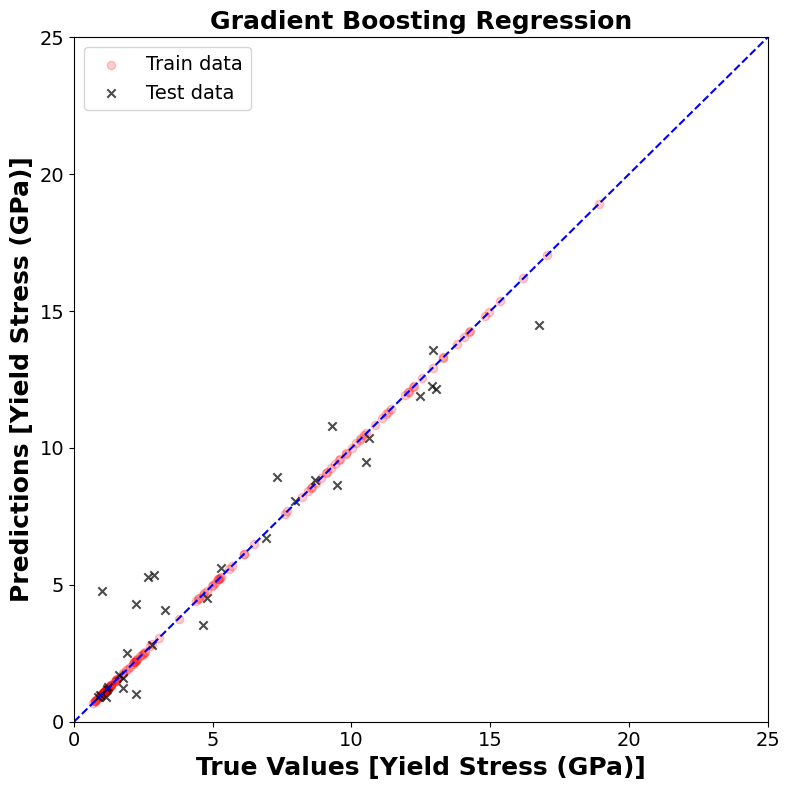

In [17]:
import matplotlib as mpl

# Make EPS Illustrator-friendly
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

# Your plotting code...
test_predictions = gb_regressor.predict(X_test)
train_predictions = gb_regressor.predict(X_train)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_train, train_predictions, c='red', alpha=0.2, label='Train data', marker='o')
plt.scatter(y_test, test_predictions, c='black', alpha=0.7, label='Test data', marker='x')
plt.xlabel('True Values [Yield Stress (GPa)]', fontsize=18, fontweight='bold')
plt.ylabel('Predictions [Yield Stress (GPa)]', fontsize=18, fontweight='bold')
plt.title('Gradient Boosting Regression', fontsize=18, fontweight='bold')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.plot(lims, lims, color='blue', linestyle='--')

plt.tight_layout()

# Save as EPS
plt.savefig('actual_vs_predicted.eps', format='eps', bbox_inches='tight', pad_inches=0.02)

# Optional: also save as PNG for quick viewing
plt.savefig('actual_vs_predicted.png', dpi=300)

plt.show()


In [16]:
df.head(5)

,Fe-Fe (SRO),Fe-Ni (SRO),Cr-Fe (SRO),Co-Fe (SRO),Al-Fe (SRO),Ni-Ni (SRO),Cr-Ni (SRO),Co-Ni (SRO),Al-Ni (SRO),Cr-Cr (SRO),...,Al-Cr (SRO),Co-Co (SRO),Al-Co (SRO),Al-Al(SRO),Al (at%),Co (at%),Cr (at%),Fe (at%),Ni (at%),Yield Stress (GPa)
0,-0.180247,0.092438,0.146759,0.144797,-1.239506,-0.052160,-0.040123,-0.010935,0.087037,-0.104938,...,0.560494,-0.060519,0.215520,0.881481,0.05,0.35,0.2,0.2,0.2,11.0897
1,-0.165432,0.116821,0.168673,0.132988,-1.148663,-0.032407,-0.067593,-0.020606,0.061728,-0.098457,...,0.526749,-0.040732,0.170903,0.910837,0.06,0.34,0.2,0.2,0.2,10.4649
2,-0.168827,0.097222,0.195525,0.147868,-1.049383,-0.020988,-0.056944,-0.010756,-0.004409,-0.145370,...,0.479277,-0.057262,0.157180,0.901738,0.07,0.33,0.2,0.2,0.2,10.2925
3,-0.166975,0.102623,0.223302,0.151427,-1.003086,-0.035494,-0.079938,0.005498,0.010417,-0.145370,...,0.427469,-0.065297,0.133150,0.880401,0.08,0.32,0.2,0.2,0.2,9.7913
4,-0.159877,0.121142,0.209722,0.155814,-0.916667,-0.038272,-0.070988,-0.000498,-0.024691,-0.154938,...,0.388889,-0.066148,0.110359,0.847584,0.09,0.31,0.2,0.2,0.2,9.5492


In [16]:
# Check lengths after splitting
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({
    'Actual (Test)': y_test,
    'Predicted (Test)': test_predictions})

# Save the DataFrame to an Excel file
results_df.to_excel('Gradient Boosting test four element predicted_actual_values.xlsx', index=False)

Length of X_test: 32
Length of y_test: 32


In [17]:
# Check lengths after splitting
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({
    'Actual (Train)': y_train,
    'Predicted (Train)': train_predictions})

# Save the DataFrame to an Excel file
results_df.to_excel('Gradient Boosting train four element predicted_actual_values.xlsx', index=False)

Length of X_train: 128
Length of y_train: 128


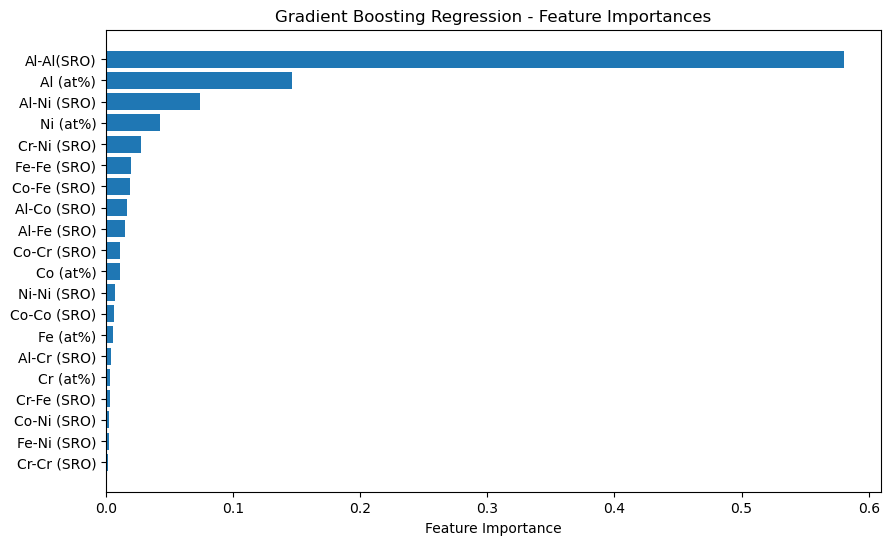

In [18]:
# Plot feature importances
feature_importances = gb_regressor.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Regression - Feature Importances')
plt.savefig('Gradient Boosting Regression feature importance', dpi=300)  # Change file format and dpi as needed
plt.show()

In [19]:
# calculate these metrics by hand!
from sklearn import metrics


mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
nrmse = rmse / (np.max(y_test) - np.min(y_test))

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('NRMSE:', nrmse)

MAE: 0.8505287585036503
MSE: 1.5544825770740478
RMSE: 1.2467889063807265
NRMSE: 0.07854184188058147


In [20]:
from sklearn.metrics import r2_score

# Assuming 'predictions' is the predicted values and 'Y_test' is the true values
r2_value_train = r2_score(y_train, train_predictions)
r2_value_test = r2_score(y_test, test_predictions)

# Print or use the R-squared value
print(f'R-squared value of train data: {r2_value_train}')
print(f'R-squared value of test data: {r2_value_test}')

R-squared value of train data: 0.9999999819119343
R-squared value of test data: 0.9255978532875849


In [22]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

In [23]:
X = df.drop('Yield Stress (GPa)', axis=1)  # Features
y = df['Yield Stress (GPa)']  # Target

In [24]:
# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Define KFold for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Step 4: Perform KFold cross-validation and calculate R², MAE, MSE, and RMSE for each fold
test_r2_scores = []
train_r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []

for train_index, test_index in kf.split(X):
    # Split data into training and test sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    gb_regressor.fit(X_train, y_train)
    
    # Make predictions on the test set
    test_predictions = gb_regressor.predict(X_test)
    train_predictions = gb_regressor.predict(X_train)
    
    # Calculate R^2 for test and train data
    test_r2 = r2_score(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    
    # Calculate MAE for the test set
    mae = mean_absolute_error(y_test, test_predictions)
    
    # Calculate MSE and RMSE for the test set
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    
    # Store the results for each fold
    test_r2_scores.append(test_r2)
    train_r2_scores.append(train_r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Step 5: Print individual fold results and the averages
print("Test R² for each fold:", test_r2_scores)
print("Train R² for each fold:", train_r2_scores)
print("MAE for each fold:", mae_scores)
print("MSE for each fold:", mse_scores)
print("RMSE for each fold:", rmse_scores)

# Calculate and print the averages
print("\nAverage Test R²:", np.mean(test_r2_scores))
print("Average Train R²:", np.mean(train_r2_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))


Test R² for each fold: [0.9218188395141199, 0.9324568278200974, 0.9740864120932063, 0.8984892212014454, 0.894600859429528]
Train R² for each fold: [0.9990810404697928, 0.9992570801239035, 0.9990682476705959, 0.999358626986929, 0.9992465552028003]
MAE for each fold: [0.7869714688827003, 0.7341699622850797, 0.5943729090381942, 0.8836224659857596, 0.9282082184364354]
MSE for each fold: [1.6334374369664704, 1.4772642700122354, 0.7185058602920649, 1.8027435869835244, 2.502784209575102]
RMSE for each fold: [np.float64(1.278060028702279), np.float64(1.215427607886309), np.float64(0.8476472499171249), np.float64(1.3426628716783393), np.float64(1.5820190294604872)]

Average Test R²: 0.9242904320116793
Average Train R²: 0.9992023100908043
Average MAE: 0.7854690049256339
Average MSE: 1.6269470727658792
Average RMSE: 1.253163357528908


In [147]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the base estimator (no need to set n_estimators/learning_rate here)
gb = GradientBoostingRegressor(random_state=42)

# Specify the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='r2',       # optimize for R²
    cv=5,               # 5‑fold cross‑validation
    n_jobs=-1,          # use all cores
    verbose=2           # shows progress
)

# Run the grid search
grid_search.fit(X_train, y_train)

# Inspect the best combination found
print("Best hyperparameters:", grid_search.best_params_)
print("Best CV R² score:    ", grid_search.best_score_)

# Retrieve the best estimator
best_gb = grid_search.best_estimator_

# Evaluate on train and test
print("Train R²:", best_gb.score(X_train, y_train))
print("Test  R²:", best_gb.score(X_test,  y_test))


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best CV R² score:     0.749625318211311
Train R²: 0.9777515569577614
Test  R²: 0.8074948005224903
